<center><h1>Twitch Streaming Data Analysis Using SQL</h1></center>
Twitch is a streaming platform that over 15 million daily active users generating copious amounts of data. The dataset for this particular project is 800,000 rows long and we will use it analyze some popular streaming trends within the area of gaming. This project will utilize some basic query techniques in order to prepare for data visualizations in Python later on. Here we will find out what the most popular games are and when the highest streaming times are.   


In [ ]:
-- Let's take a look at the main dataset we are dealing with to get an idea of the structure and values
SELECT * 
FROM stream
LIMIT 10;

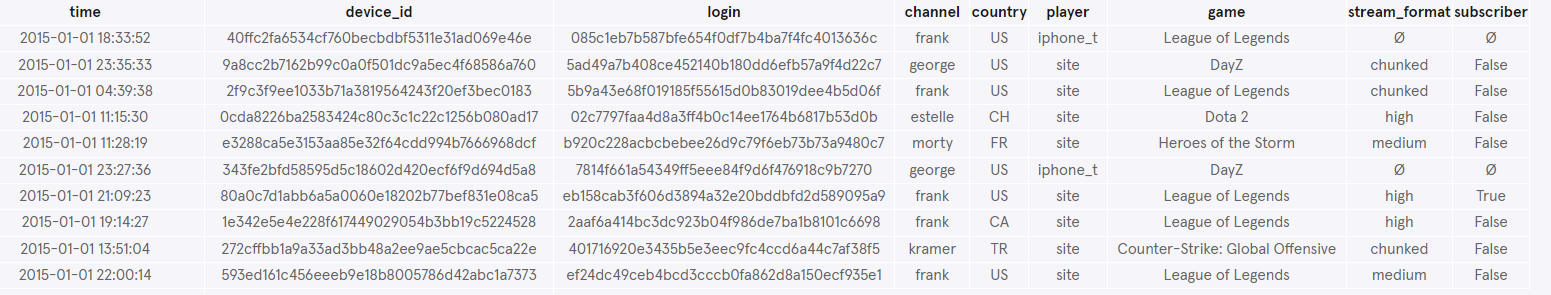

In [ ]:
-- Let's look at the most popular games based on total stream count
SELECT
  game,
  COUNT(*)
FROM stream
GROUP BY 1
ORDER BY 2 DESC;

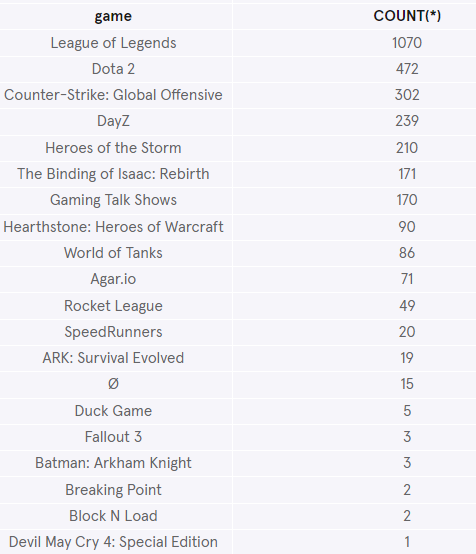

It looks like League of Legends is dominating the stream counts, this could be due to the competitive and tight knit community of LoL.

In [ ]:
-- Let's see what countries are the top viewers for LoL 
SELECT 
  country, 
  COUNT(*)
FROM stream
WHERE game = 'League of Legends'
GROUP BY 1
ORDER BY 2 DESC;

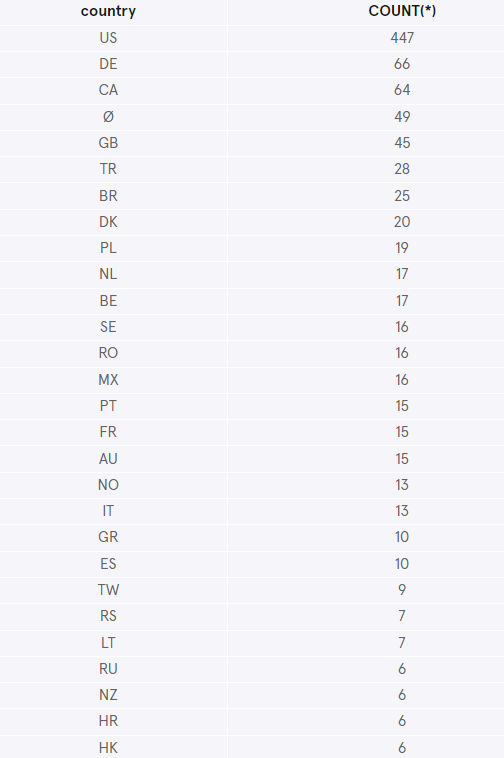

In [ ]:
-- Now that we know the top game, let's query the streaming sources
SELECT 
  player, 
  COUNT(*)
FROM stream
GROUP BY 1
ORDER BY 2 DESC;

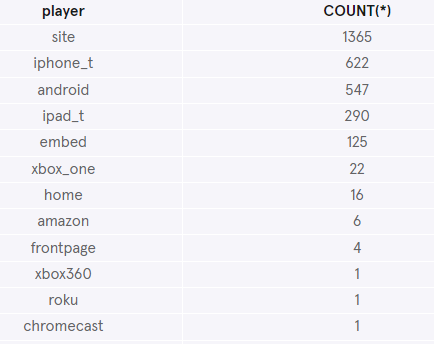

The overwhelming majority of streaming players come from the website (both phone and computer) and the Twitch phone app. 

In [ ]:
-- Let's feature engineer a new column named genre to gain some better insight into the main interests of viewers 
SELECT 
  game,
  -- Here we mainly want to focus on the most popular games
  CASE
    WHEN game = "League of Legends" 
      THEN 'MOBA'
    WHEN game = 'Dota 2' 
      THEN 'MOBA'
    WHEN game = 'Heroes of the Storm'
      THEN 'MOBA'
    WHEN game = 'Counter-Strike: Global Offensive' 
      THEN 'FPS'
    WHEN game = 'DayZ'
      THEN 'Survival'
    WHEN game = 'ARK: Survival Evolved'
      THEN 'Survival'
    ELSE 'Other'
  END AS genre,
  COUNT(*)
FROM stream
GROUP BY 1
ORDER BY 3 DESC;

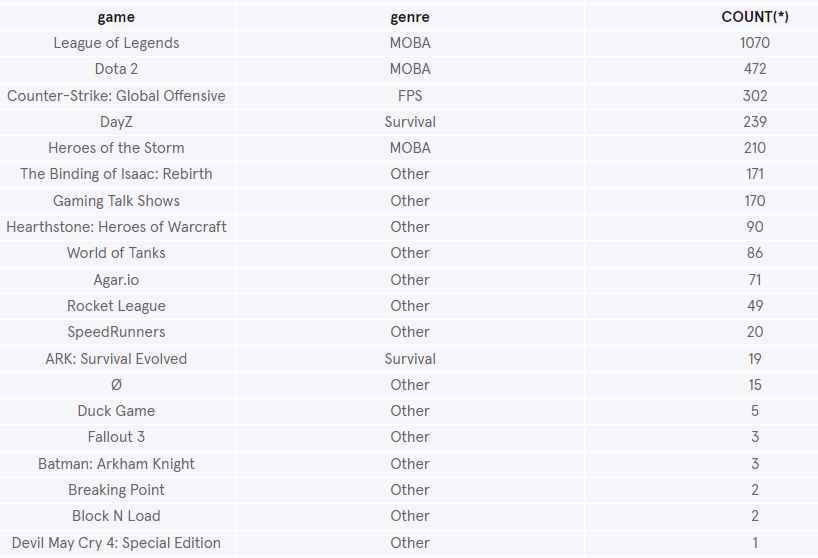

In [ ]:
-- Let's see what time most people in the US are streaming Twitch 
SELECT strftime('%H', time),
   COUNT(*)
FROM stream
WHERE country = 'US'
GROUP BY 1;

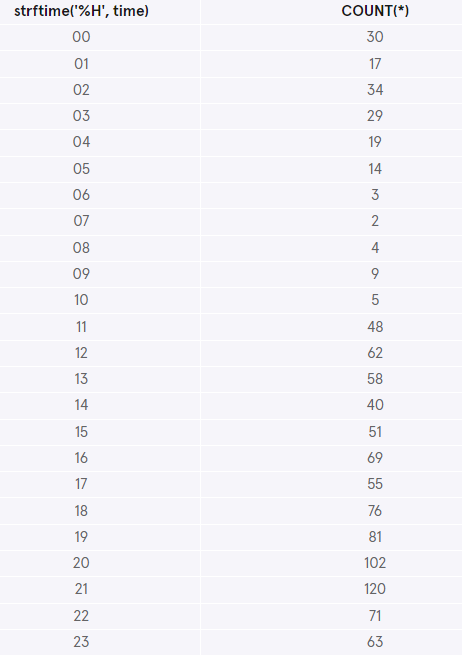

As we can see, as the day the progresses into the late afternoon and early evening, the views get prgressively larger and maintain a steady rate late into the night.

In [ ]:
-- Since the stream and chat table contain the same "device_id", we can join them to track chats as well
SELECT *
FROM stream
JOIN chat
ON stream.device_id = chat.device_id
LIMIT 15;

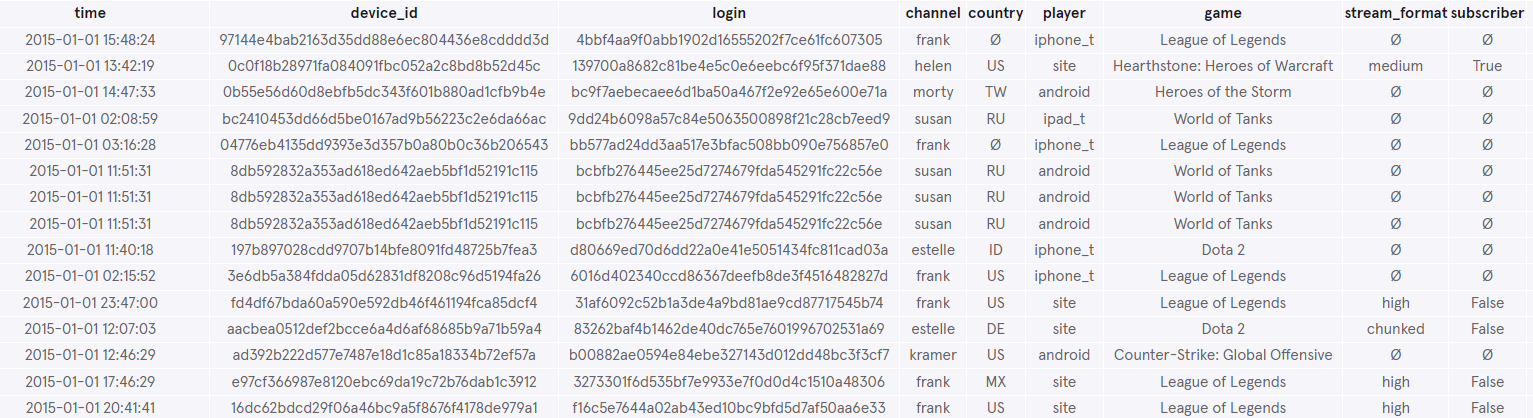
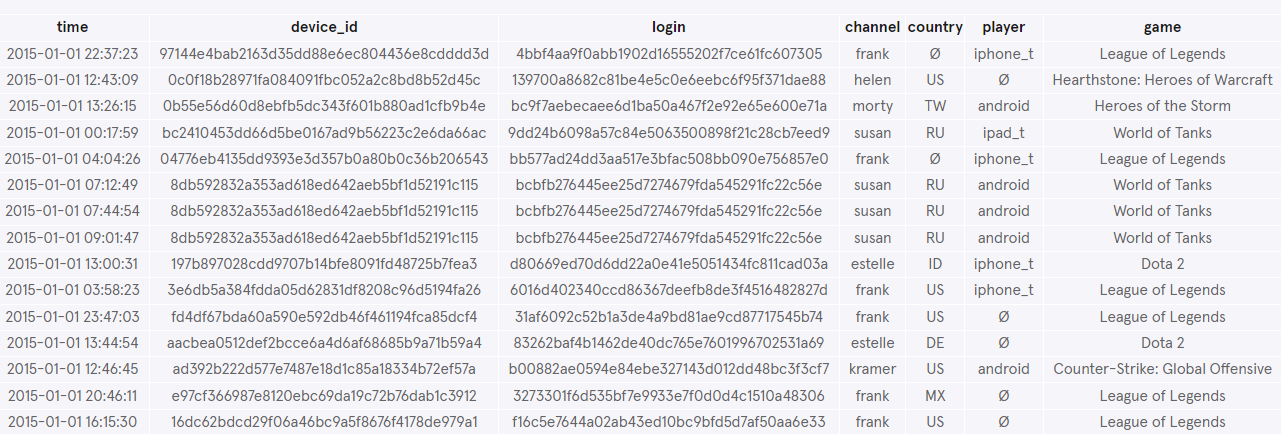